# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [22]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

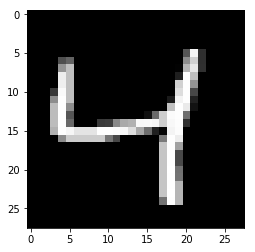

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [33]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_pixels = 784

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, ( None, image_pixels))
targets_ = tf.placeholder(tf.float32, (None, image_pixels))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_pixels)
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [34]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [35]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6938
Epoch: 1/20... Training loss: 0.6910
Epoch: 1/20... Training loss: 0.6884
Epoch: 1/20... Training loss: 0.6848
Epoch: 1/20... Training loss: 0.6809
Epoch: 1/20... Training loss: 0.6761
Epoch: 1/20... Training loss: 0.6699
Epoch: 1/20... Training loss: 0.6617
Epoch: 1/20... Training loss: 0.6532
Epoch: 1/20... Training loss: 0.6408
Epoch: 1/20... Training loss: 0.6309
Epoch: 1/20... Training loss: 0.6177
Epoch: 1/20... Training loss: 0.6016
Epoch: 1/20... Training loss: 0.5834
Epoch: 1/20... Training loss: 0.5651
Epoch: 1/20... Training loss: 0.5502
Epoch: 1/20... Training loss: 0.5309
Epoch: 1/20... Training loss: 0.5140
Epoch: 1/20... Training loss: 0.4969
Epoch: 1/20... Training loss: 0.4729
Epoch: 1/20... Training loss: 0.4549
Epoch: 1/20... Training loss: 0.4378
Epoch: 1/20... Training loss: 0.4242
Epoch: 1/20... Training loss: 0.4059
Epoch: 1/20... Training loss: 0.3948
Epoch: 1/20... Training loss: 0.3823
Epoch: 1/20... Training loss: 0.3750
E

Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.1967
Epoch: 1/20... Training loss: 0.2017
Epoch: 1/20... Training loss: 0.1982
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.2032
Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1946
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1970
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1946
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1976
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1938
E

Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1631
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1640
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1532
E

Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1315
E

Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1283
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1216
E

Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1187
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1190
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1198
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1187
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1172
E

Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1041
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1046
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1040
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1064
E

Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1014
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1025
E

Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0986
E

Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1005
E

Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.1007
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.1024
E

Epoch: 9/20... Training loss: 0.0925
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0969
E

Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0911
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0901
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0994
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0903
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0894
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0895
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0975
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0983
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0881
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0895
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0980
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0900
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0891
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0882
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0888
Epoch: 18/20... Training loss: 0.0895
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0871
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0885
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0881
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0895
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0972
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0990
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

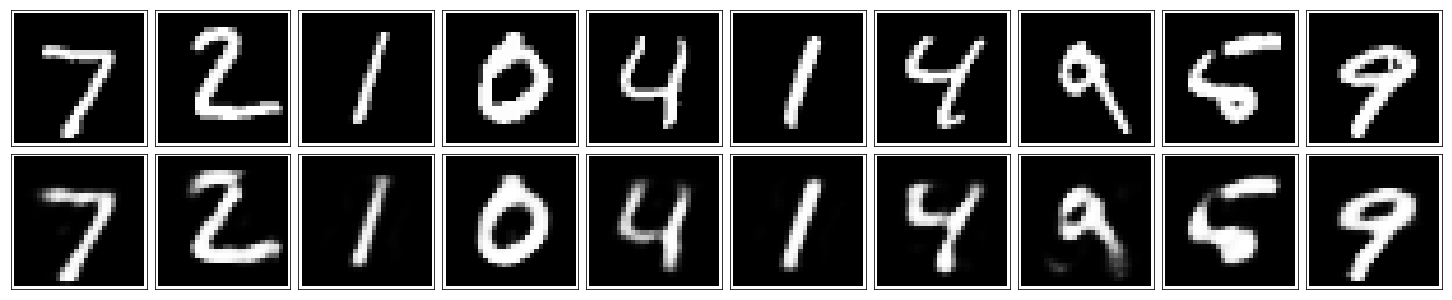

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [44]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.